In [14]:
from sympy import *
import sympy
from IPython.display import Latex
%init_sympy_printing
x, y, z = symbols("x, y, z")
a, b = symbols("a, b")
f = Function("f")

## 符号运算

### 表达式变换和化简

In [15]:
simplify((x + 2) ** 2 - (x + 1) ** 2)

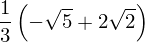

In [16]:
radsimp(1 / (sqrt(5) + 2 * sqrt(2)))

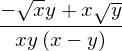

In [17]:
radsimp(1 / (y * sqrt(x) + x * sqrt(y)))

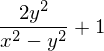

In [18]:
ratsimp(x / (x + y) + y / (x - y))

In [19]:
%sympy_latex fraction(ratsimp(1 / x + 1 / y))

<IPython.core.display.Latex object>

In [20]:
%sympy_latex fraction(1 / x + 1 / y)

<IPython.core.display.Latex object>

In [21]:
cancel((x ** 2 - 1) / (1 + x))

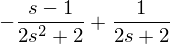

In [22]:
s = symbols("s")
trans_func = 1/(s**3 + s**2 + s + 1)
apart(trans_func)

In [23]:
trigsimp(sin(x) ** 2 + 2 * sin(x) * cos(x) + cos(x) ** 2)

In [24]:
expand_trig(sin(2 * x + y))

In [25]:
#%hide
from tabulate import tabulate
from IPython.display import Markdown, display_markdown
flags = ["mul", "log", "multinomial", "power_base", "power_exp"]
expressions = [x * (y + z), log(x * y ** 2), (x + y) ** 3, (x * y) ** z, x ** (y + z)]
infos =["展开乘法", "展开对数函数的参数中的乘积和幂运算", 
        "展开加减法表达式的整数次幂", "展开幂函数的底数乘积", "展开对幂函数的指数和"]
table = []
for flag, expression, info in zip(flags, expressions, infos):
    table.append(["`{}`".format(flag), 
                  "`expand({})`".format(expression), 
                  "${}$".format(latex(expand(expression))),
                 info])

display_markdown(Markdown(tabulate(table, ["标志", "表达式", "结果", "说明"], "pipe")))

| 标志            | 表达式                   | 结果                                      | 说明                |
|:--------------|:----------------------|:----------------------------------------|:------------------|
| `mul`         | `expand(x*(y + z))`   | $x y + x z$                             | 展开乘法              |
| `log`         | `expand(log(x*y**2))` | $\log{\left (x y^{2} \right )}$         | 展开对数函数的参数中的乘积和幂运算 |
| `multinomial` | `expand((x + y)**3)`  | $x^{3} + 3 x^{2} y + 3 x y^{2} + y^{3}$ | 展开加减法表达式的整数次幂     |
| `power_base`  | `expand((x*y)**z)`    | $\left(x y\right)^{z}$                  | 展开幂函数的底数乘积        |
| `power_exp`   | `expand(x**(y + z))`  | $x^{y} x^{z}$                           | 展开对幂函数的指数和        |

In [26]:
x, y, z = symbols("x,y,z", positive=True)
expand(x * log(y * z), mul=False)

In [62]:
#%hide
from tabulate import tabulate
from IPython.display import Markdown
flags = ["complex", "func", "trig"]
expressions = [x * y, gamma(1 + x), sin(x + y)]
infos =["展开乘法", "展开对数函数的参数中的乘积和幂运算", 
        "展开加减法表达式的整数次幂", "展开幂函数的底数乘积", "展开对幂函数的指数和"]
table = []
for flag, expression, info in zip(flags, expressions, infos):
    table.append(["`{}`".format(flag), 
                  "`expand({})`".format(expression), 
                  "${}$".format(latex(expand(expression))),
                 info])

display_markdown(Markdown(tabulate(table, ["标志", "表达式", "结果", "说明"], "pipe")))

| 标志        | 表达式                    | 结果                            | 说明                |
|:----------|:-----------------------|:------------------------------|:------------------|
| `complex` | `expand(x*y)`          | $x y$                         | 展开乘法              |
| `func`    | `expand(gamma(x + 1))` | $\Gamma{\left(x + 1 \right)}$ | 展开对数函数的参数中的乘积和幂运算 |
| `trig`    | `expand(sin(x + y))`   | $\sin{\left (x + y \right )}$ | 展开加减法表达式的整数次幂     |

In [30]:
x, y = symbols("x,y", complex=True)
expand(x * y, complex=True)

In [31]:
expand(gamma(1 + x), func=True)

In [32]:
expand(sin(x + y), trig=True)

In [33]:
factor(15 * x ** 2 + 2 * y - 3 * x - 10 * x * y)

In [34]:
eq = (1 + a * x) ** 3 + (1 + b * x) ** 2
eq2 = expand(eq)
collect(eq2, x)

In [35]:
p = collect(eq2, x, evaluate=False)
%C p[S(1)]; p[x**2]

p[S(1)]     p[x**2]   
-------  -------------
2        3*a**2 + b**2


In [36]:
%C eq2.coeff(x, 0); eq2.coeff(x, 2)

eq2.coeff(x, 0)  eq2.coeff(x, 2)
---------------  ---------------
2                3*a**2 + b**2  


In [37]:
collect(a * sin(2 * x) + b * sin(2 * x), sin(2 * x))

### 方程

In [38]:
a, b, c = symbols("a,b,c")
%sympy_latex solve(a * x ** 2 + b * x + c, x)

<IPython.core.display.Latex object>

In [39]:
%sympy_latex solve((x ** 2 + x * y + 1, y ** 2 + x * y + 2), x, y)

<IPython.core.display.Latex object>

In [40]:
%sympy_latex roots(x**3 - 3*x**2 + x + 1)

<IPython.core.display.Latex object>

### 微分

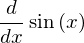

In [41]:
t = Derivative(sin(x), x)
t

In [42]:
t.doit()

In [43]:
diff(sin(2*x), x)

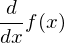

In [44]:
Derivative(f(x), x)

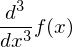

In [45]:
Derivative(f(x), x, x, x) # 也可以写作Derivative(f(x), x, 3)

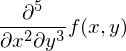

In [46]:
Derivative(f(x, y), x, 2, y, 3)

In [47]:
diff(sin(x * y), x, 2, y, 3)

### 微分方程

In [48]:
x=symbols('x')
f=symbols('f', cls=Function)
dsolve(Derivative(f(x), x) - f(x), f(x))

In [49]:
eq = Eq(f(x).diff(x) + f(x), (cos(x) - sin(x)) * f(x)**2)
classify_ode(eq, f(x))

('1st_power_series', 'lie_group')

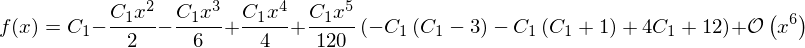

In [50]:
dsolve(eq, f(x))

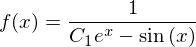

In [51]:
dsolve(eq, f(x), hint="lie_group")

In [52]:
dsolve(eq, f(x), hint="all")

{'1st_power_series': f(x) == C1 - C1*x**2/2 - C1*x**3/6 + C1*x**4/4 + C1*x**5*(-C1*(C1 - 3) - C1*(C1 + 1) + 4*C1 + 12)/120 + O(x**6),
 'best': f(x) == C1 - C1*x**2/2 - C1*x**3/6 + C1*x**4/4 + C1*x**5*(-C1*(C1 - 3) - C1*(C1 + 1) + 4*C1 + 12)/120 + O(x**6),
 'best_hint': '1st_power_series',
 'default': '1st_power_series',
 'lie_group': f(x) == 1/(C1*exp(x) - sin(x)),
 'order': 1}

In [53]:
%omit sympy.ode.allhints

('separable',
 '1st_exact',
 '1st_linear',
 'Bernoulli',
...


### 积分

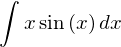

In [54]:
e = Integral(x*sin(x), x)
e    

In [55]:
e.doit()

In [56]:
e2 = Integral(sin(x)/x, (x, 0, 1))
e2.doit()

In [58]:
print((e2.evalf()))
print((e2.evalf(50))) # 可以指定精度

0.946083070367183
0.94608307036718301494135331382317965781233795473811


In [59]:
e3 = Integral(sin(x)/x, (x, 0, oo))
e3.evalf()

In [61]:
e3.doit()